<a href="https://colab.research.google.com/github/canaytsr/GlobalAIHubPythonHomework/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Import Boston Dataset from sklearn dataset class
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
print(boston.feature_names)
print(type(boston))
print(boston.data.shape)



['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'sklearn.utils.Bunch'>
(506, 13)


      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-nu

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

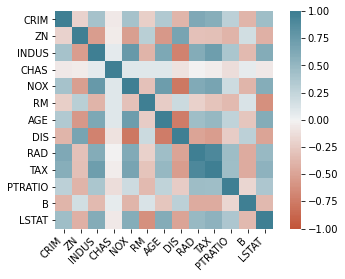

In [72]:
#Exploring and analysing raw data.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
print(boston_pd.head())
print(boston_pd.info())

boston_pd.describe()# summary statistics

B= pd.DataFrame(boston.data, columns = boston.feature_names)
corr_df = B.corr()#corr_matrix
print(corr_df)
B.isna().sum()

ax = sns.heatmap(corr_df,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

boston_pd.isnull().sum()


In [75]:
#Do preprocessing for regression.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X, y = load_boston(return_X_y = True)
print(X.shape)
print(y.shape)

X = boston_pd.drop(['CRIM'] ,axis=1)
X1=preprocessing.scale(X)
X1=pd.DataFrame(X1,columns=X.columns)

y= boston_pd[['CRIM']]# original target variable 
y1=preprocessing.scale(y)
y1=pd.DataFrame(y1,columns=y.columns)
y1
X1

(506, 13)
(506,)


,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [76]:
# Split the data into a test set and a training set X_train, X_test, y_train, y_test = 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=42) 
print(X_train.shape)


(354, 12)


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[0.        , 0.03656238, 0.        , ..., 0.64893617, 0.99299007,
        0.09602649],
       [0.        , 0.33169996, 0.        , ..., 0.55319149, 0.99092239,
        0.28449227],
       [0.        , 0.21485111, 0.        , ..., 0.56382979, 1.        ,
        0.23399558],
       ...,
       [0.84210526, 0.03015454, 0.        , ..., 0.46808511, 0.98497151,
        0.11754967],
       [0.        , 0.63663777, 0.        , ..., 0.80851064, 0.27618639,
        0.59437086],
       [0.        , 0.27704485, 0.        , ..., 0.88297872, 0.1777195 ,
        0.24558499]])

In [80]:
#Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
from sklearn.linear_model import  LinearRegression,Ridge,Lasso
ridge_model1 = Ridge(alpha = 0.001)
ridge_model1.fit(X_train, y_train)
print(f'Ridge model 1 coef: {ridge_model1.coef_}')
print("\n")
ridge_model2 = Ridge(alpha = 0.01)
ridge_model2.fit(X_train, y_train)
print(f'Ridge model 2 coef: {ridge_model2.coef_}')
print("\n")
ridge_model3 = Ridge(alpha = 0.05)
ridge_model3.fit(X_train, y_train)
print(f'Ridge model 3 coef: {ridge_model3.coef_}')
print("\n")
ridge_model4 = Ridge(alpha = 0.1)
ridge_model4.fit(X_train, y_train)
print(f'Ridge model 4 coef: {ridge_model4.coef_}')
print("\n")
ridge_model5 = Ridge(alpha = 1)
ridge_model5.fit(X_train, y_train)
print(f'Ridge model 5 coef: {ridge_model5.coef_}')
print("\n")

lasso_model1 = Lasso(alpha = 0.001)
lasso_model1.fit(X_train, y_train)
print(f'Lasso model 1 coef: {lasso_model1.coef_}')
print("\n")
lasso_model2 = Lasso(alpha = 0.01)
lasso_model2.fit(X_train, y_train)
print(f'Lasso model 2 coef: {lasso_model2.coef_}')
print("\n")
lasso_model3 = Lasso(alpha = 0.05)
lasso_model3.fit(X_train, y_train)
print(f'Lasso model 3 coef: {lasso_model3.coef_}')
print("\n")
lasso_model4 = Lasso(alpha = 0.1)
lasso_model4.fit(X_train, y_train)
print(f'Lasso model 4 coef: {lasso_model4.coef_}')
print("\n")
lasso_model5 = Lasso(alpha = 1)
lasso_model5.fit(X_train, y_train)
print(f'Lasso model 5 coef: {lasso_model5.coef_}')
print("\n")

Ridge model 1 coef: [[ 3.57842756 -0.2478381  -1.86272372 -4.76385723 -1.90326289  1.55133569
  -7.70127752 13.07479189 -0.57353118 -1.12982223 -1.42516982  5.30637762]]


Ridge model 2 coef: [[ 3.56756055 -0.25297013 -1.86119551 -4.74414193 -1.89735207  1.5515269
  -7.67482003 13.05580672 -0.55288539 -1.12538242 -1.42581273  5.30018916]]


Ridge model 3 coef: [[ 3.52022928 -0.2750091  -1.85451428 -4.65804309 -1.87167023  1.55230637
  -7.55945693 12.97290358 -0.46302928 -1.10587525 -1.42863632  5.27285984]]


Ridge model 4 coef: [[ 3.46319458 -0.30086786 -1.84640635 -4.5537967  -1.84085787  1.55312463
  -7.4201738  12.87253013 -0.3549013  -1.08199449 -1.43208938  5.23910263]]


Ridge model 5 coef: [[ 2.72114761 -0.54884475 -1.73245952 -3.1483606  -1.45270022  1.54657108
  -5.58879747 11.50768856  1.03043386 -0.72736143 -1.48182862  4.70656213]]


Lasso model 1 coef: [ 3.49780486 -0.24180651 -1.84740968 -4.63384616 -1.78797063  1.50762448
 -7.5396255  12.95826143 -0.44433609 -1.0857164 

In [81]:
#Evaluate the results of all models and choose the best performing model.
print('*************************')
#Lasso
print("Lasso Train 1: ", lasso_model1.score(X_train, y_train))
print("Lasso Test 1: ", lasso_model1.score(X_test, y_test))
print('*************************')
print("Lasso Train 2: ", lasso_model2.score(X_train, y_train))
print("Lasso Test 2: ", lasso_model4.score(X_test, y_test))
print('*************************')
print("Lasso Train 3: ", lasso_model3.score(X_train, y_train))
print("Lasso Test 3: ", lasso_model3.score(X_test, y_test))
print('*************************')
print("Lasso Train 4: ", lasso_model4.score(X_train, y_train))
print("Lasso Test 4: ", lasso_model4.score(X_test, y_test))
print('*************************')
print("Lasso Train 5: ", lasso_model5.score(X_train, y_train))
print("Lasso Test 5: ", lasso_model5.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train 1: ", ridge_model1.score(X_train, y_train))
print("Ridge Test 1: ", ridge_model1.score(X_test, y_test))
print('*************************')
print("Ridge Train 2: ", ridge_model2.score(X_train, y_train))
print("Ridge Test 2: ", ridge_model2.score(X_test, y_test))
print('*************************')
print("Ridge Train 3: ", ridge_model3.score(X_train, y_train))
print("Ridge Test 3: ", ridge_model3.score(X_test, y_test))
print('*************************')
print("Ridge Train 4: ", ridge_model4.score(X_train, y_train))
print("Ridge Test 4: ", ridge_model4.score(X_test, y_test))
print('*************************')
print("Ridge Train 5: ", ridge_model5.score(X_train, y_train))
print("Ridge Test 5: ", ridge_model5.score(X_test, y_test))
print('*************************')


#best performing model is Lasso Regression model


*************************
Lasso Train 1:  0.4224818760181258
Lasso Test 1:  -2356.348811538621
*************************
Lasso Train 2:  0.4214522763701364
Lasso Test 2:  -646.1652627996583
*************************
Lasso Train 3:  0.41052985114420426
Lasso Test 3:  -311.4872536222205
*************************
Lasso Train 4:  0.4030761254665351
Lasso Test 4:  -646.1652627996583
*************************
Lasso Train 5:  0.28475507785627274
Lasso Test 5:  -79.0924295600728
*************************
Ridge Train 1:  0.42249475908107814
Ridge Test 1:  -2908.598532937504
*************************
Ridge Train 2:  0.42249446880534264
Ridge Test 2:  -2830.3889450438305
*************************
Ridge Train 3:  0.42248763979073245
Ridge Test 3:  -2511.159544223119
*************************
Ridge Train 4:  0.4224672629176939
Ridge Test 4:  -2172.580721945512
*************************
Ridge Train 5:  0.42088018606854327
Ridge Test 5:  -2191.3863557119753
*************************
